In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
dataset_path = '/content/drive/MyDrive/img_dataset'

In [6]:
img_list = glob.glob(os.path.join(dataset_path,'*/*.jpg'))

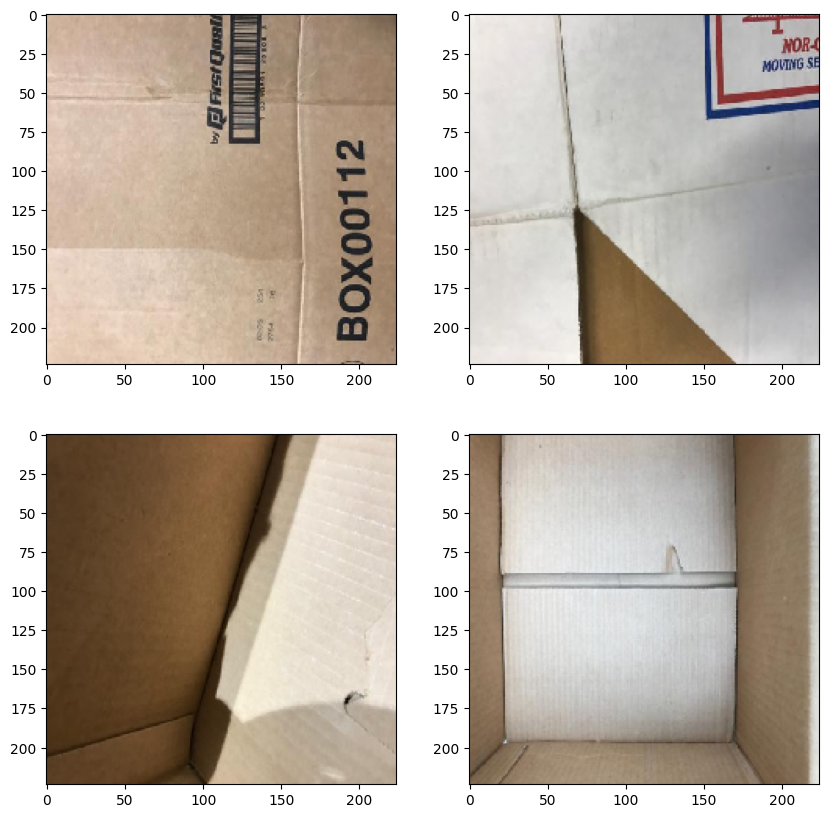

In [7]:
plt.figure(figsize=(10,10))
for i in range(0,4):
  img = tf.keras.preprocessing.image.load_img(img_list[i+1],target_size=(224,224))
  img = tf.keras.preprocessing.image.img_to_array(img,dtype=np.uint8)
  plt.subplot(2,2,i+1)
  plt.imshow(img)

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_generator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

Found 2276 images belonging to 6 classes.


In [ ]:
test_generator = test_generator.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

Found 503 images belonging to 6 classes.


In [ ]:
model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),include_top=False, weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
input_layer = model.layers[0].input
inputs= model.layers[-1].output
x = tf.keras.layers.Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu')(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(6,activation='softmax')(x)
myModel = tf.keras.Model(input_layer,x)

In [ ]:
model.trainable=False
# model.summary()

In [ ]:
myModel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
myModel.fit(train_generator,validation_data=test_generator,epochs=10,batch_size=32)

Epoch 1/10
143/143 [==============================] - 39s 272ms/step - loss: 1.1681 - accuracy: 0.6283 - val_loss: 0.6979 - val_accuracy: 0.7137
Epoch 2/10
143/143 [==============================] - 33s 232ms/step - loss: 0.6758 - accuracy: 0.7553 - val_loss: 0.5297 - val_accuracy: 0.8191
Epoch 3/10
143/143 [==============================] - 33s 229ms/step - loss: 0.6079 - accuracy: 0.7803 - val_loss: 0.4698 - val_accuracy: 0.8171
Epoch 4/10
143/143 [==============================] - 37s 255ms/step - loss: 0.5009 - accuracy: 0.8207 - val_loss: 0.5392 - val_accuracy: 0.7833
Epoch 5/10
143/143 [==============================] - 34s 241ms/step - loss: 0.4934 - accuracy: 0.8111 - val_loss: 0.4069 - val_accuracy: 0.8231
Epoch 6/10
143/143 [==============================] - 33s 230ms/step - loss: 0.4171 - accuracy: 0.8449 - val_loss: 0.3574 - val_accuracy: 0.8648
Epoch 7/10
143/143 [==============================] - 32s 224ms/step - loss: 0.4296 - accuracy: 0.8431 - val_loss: 0.3692 - val_ac

In [ ]:
myModel.save('garbage_classifier.h5')


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
# 1. Load mô hình đã lưu
model = tf.keras.models.load_model('/content/drive/MyDrive/model ai/garbage_classifier.h5')

In [ ]:
# 2. Tên các lớp giống lúc train (ví dụ 6 loại rác)
class_labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# 3. Hàm dự đoán ảnh
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0  # Chuẩn hóa ảnh
    preds = model.predict(x)
    predicted_class = class_labels[np.argmax(preds)]
    confidence = np.max(preds)
    print(f"Ảnh '{img_path}' được dự đoán là: {predicted_class} (độ tin cậy: {confidence:.2f})")